In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga del dataset y visualización:

In [2]:
#Carga del dataset
data = pd.read_csv("..//data//ufc-master.csv")
data

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


Creación de la variable objetivo 'red_win'

In [13]:

data['Winner'] = data['Winner'].str.strip().str.lower()

data['red_win'] = (data['Winner'] == 'red').astype(int) # red_win es 1 si ganó el peleador rojo, 0 si perdió

data['red_win'].value_counts()

red_win
1    3787
0    2741
Name: count, dtype: int64

In [ ]:
data.columns.tolist() #revisar columnas para ver que variables podemos usar para nuestro modelo

['RedFighter',
 'BlueFighter',
 'RedOdds',
 'BlueOdds',
 'RedExpectedValue',
 'BlueExpectedValue',
 'Date',
 'Location',
 'Country',
 'Winner',
 'TitleBout',
 'WeightClass',
 'Gender',
 'NumberOfRounds',
 'BlueCurrentLoseStreak',
 'BlueCurrentWinStreak',
 'BlueDraws',
 'BlueAvgSigStrLanded',
 'BlueAvgSigStrPct',
 'BlueAvgSubAtt',
 'BlueAvgTDLanded',
 'BlueAvgTDPct',
 'BlueLongestWinStreak',
 'BlueLosses',
 'BlueTotalRoundsFought',
 'BlueTotalTitleBouts',
 'BlueWinsByDecisionMajority',
 'BlueWinsByDecisionSplit',
 'BlueWinsByDecisionUnanimous',
 'BlueWinsByKO',
 'BlueWinsBySubmission',
 'BlueWinsByTKODoctorStoppage',
 'BlueWins',
 'BlueStance',
 'BlueHeightCms',
 'BlueReachCms',
 'BlueWeightLbs',
 'RedCurrentLoseStreak',
 'RedCurrentWinStreak',
 'RedDraws',
 'RedAvgSigStrLanded',
 'RedAvgSigStrPct',
 'RedAvgSubAtt',
 'RedAvgTDLanded',
 'RedAvgTDPct',
 'RedLongestWinStreak',
 'RedLosses',
 'RedTotalRoundsFought',
 'RedTotalTitleBouts',
 'RedWinsByDecisionMajority',
 'RedWinsByDecisionSpl

Para construir un modelo de clasificación que prediga si ganará el peleador rojo, se seleccionaron únicamente variables que están disponibles antes del combate y que pueden influir razonablemente en su resultado. Todas las variables seleccionadas corresponden a diferencias entre los atributos del peleador rojo y azul, lo que permite capturar comparaciones directas entre ambos oponentes.

EDA + Feature engineering

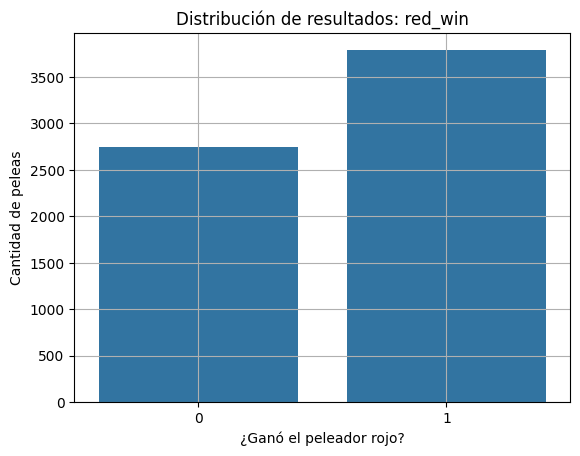

In [ ]:
#Aqui podemos darnos una idea de cuantas veces ha ganado el peleador rojo (1) y cuantas veces ha ganado el peleador azul (0)
sns.countplot(x='red_win', data=data)
plt.title('Distribución de resultados: red_win')
plt.xlabel('¿Ganó el peleador rojo?')
plt.ylabel('Cantidad de peleas')
plt.grid(True)
plt.show()


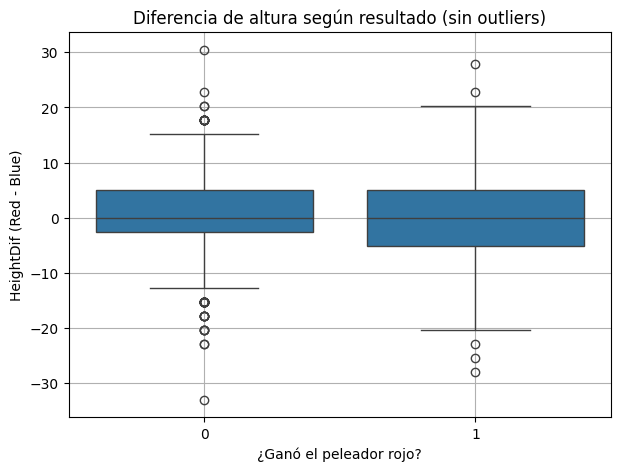

In [ ]:
#Primer boxplot: diferencia de altura 

filtered = data[(data['HeightDif'] > -50) & (data['HeightDif'] < 50)] #sacamos los outliers para una mejor visualización
plt.figure(figsize=(7, 5))
sns.boxplot(x='red_win', y='HeightDif', data=filtered)
plt.title('Diferencia de altura según resultado (sin outliers)')
plt.xlabel('¿Ganó el peleador rojo?')
plt.ylabel('HeightDif (Red - Blue)')
plt.grid(True)
plt.show()

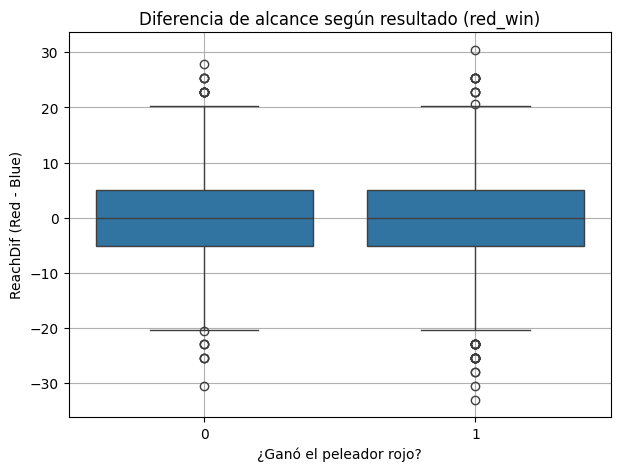

In [40]:
#Diferencia de alcance

filtered = data[(data['ReachDif'] > -50) & (data['ReachDif'] < 50)]
plt.figure(figsize=(7, 5))
sns.boxplot(x='red_win', y='ReachDif', data=filtered)
plt.title('Diferencia de alcance según resultado (red_win)')
plt.xlabel('¿Ganó el peleador rojo?')
plt.ylabel('ReachDif (Red - Blue)')
plt.grid(True)
plt.show()


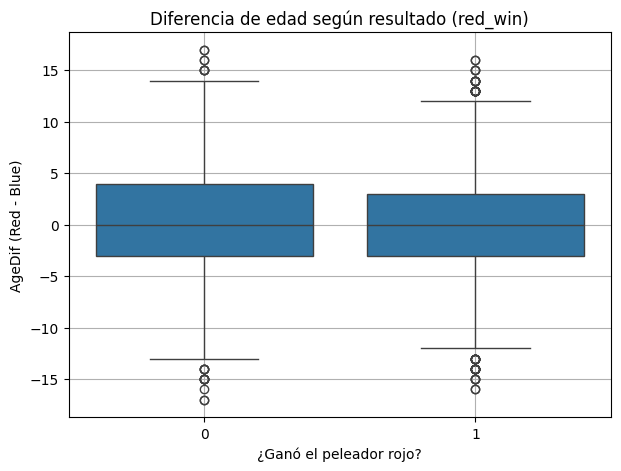

In [41]:
#Diferencia de edad

filtered = data[(data['HeightDif'] > -50) & (data['HeightDif'] < 50)]
plt.figure(figsize=(7, 5))
sns.boxplot(x='red_win', y='AgeDif', data=filtered)
plt.title('Diferencia de edad según resultado (red_win)')
plt.xlabel('¿Ganó el peleador rojo?')
plt.ylabel('AgeDif (Red - Blue)')
plt.grid(True)
plt.show()


### Interpretación de variables físicas según resultado (`red_win`)

A continuación, se presentan interpretaciones basadas en los gráficos tipo boxplot, comparando peleadores ganadores y perdedores según la diferencia entre sus características físicas.

- **HeightDif (Diferencia de altura):**  
  Se observa que los peleadores rojos que ganan tienden a tener una ligera ventaja en altura respecto a su oponente azul. Sin embargo, la distribución es relativamente simétrica, lo que sugiere que la altura no es un factor decisivo por sí sola.

- **ReachDif (Diferencia de alcance):**  
  Similar a la altura, se nota una leve tendencia a que los peleadores con mayor alcance ganen, pero la diferencia no es muy marcada. Esto indica que el alcance puede ser una ventaja, pero no garantiza la victoria.

- **AgeDif (Diferencia de edad):**  
  En promedio, los peleadores rojos ganadores tienden a ser ligeramente más jóvenes que sus oponentes. Esto podría estar relacionado con una mayor condición física o agilidad, aunque también es una diferencia moderada.

**Conclusión parcial:**  
Estas variables físicas muestran tendencias interesantes, pero por sí solas no parecen determinar el resultado de una pelea. Se requiere analizar también aspectos técnicos y de desempeño (como golpes significativos, derribos, etc.) para construir un modelo predictivo más robusto.

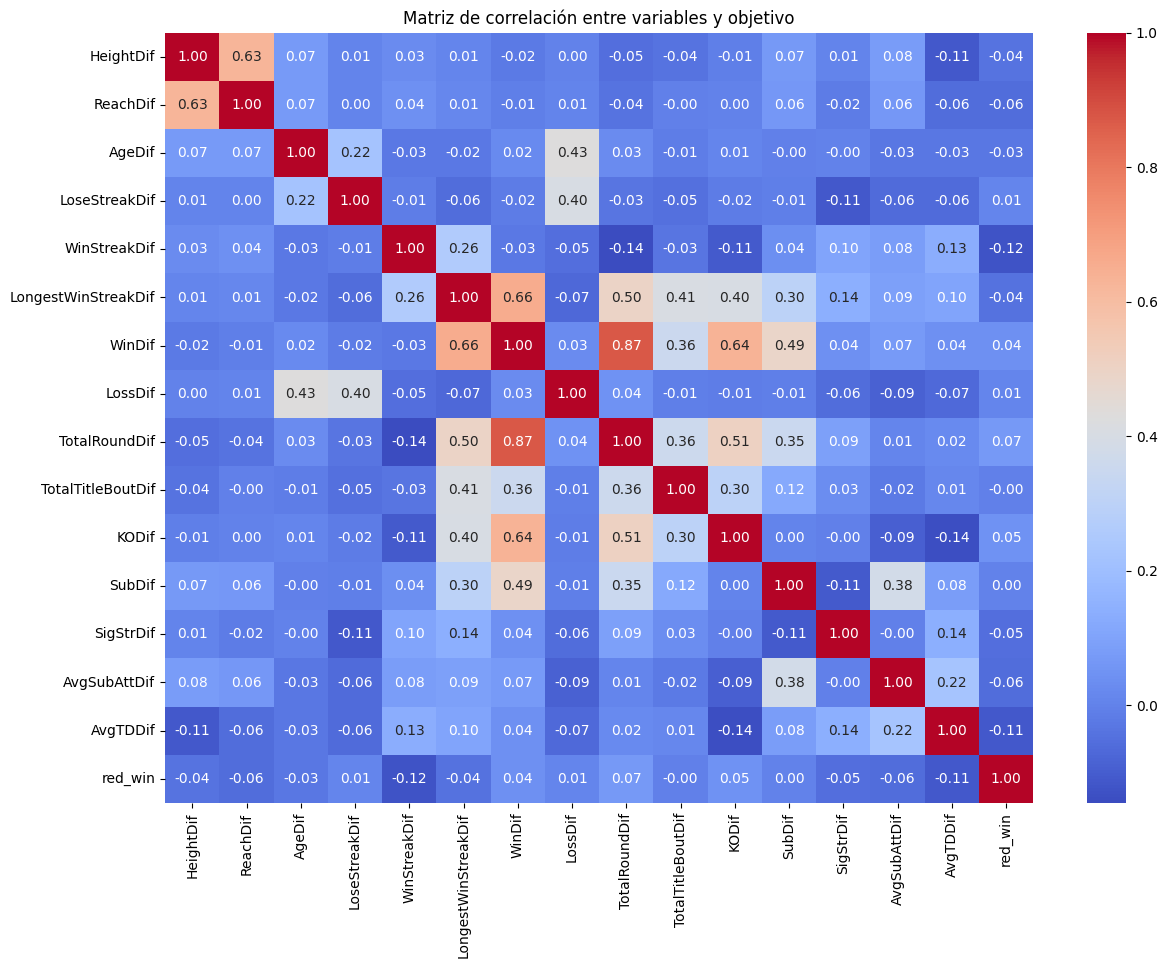

In [42]:

features = [
    'HeightDif', 'ReachDif', 'AgeDif', 'LoseStreakDif', 'WinStreakDif',
    'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif',
    'TotalTitleBoutDif', 'KODif', 'SubDif', 'SigStrDif',
    'AvgSubAttDif', 'AvgTDDif'
]

plt.figure(figsize=(14, 10))
sns.heatmap(data[features + ['red_win']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables y objetivo')
plt.show()

### Interpretación de la matriz de correlación

La matriz muestra las correlaciones entre las variables seleccionadas y la variable objetivo `red_win`. Si bien ninguna variable muestra una correlación alta con el resultado, algunas presentan tendencias interesantes:

- Variables como **`WinStreakDif`**, **`SigStrDif`** y **`AvgTDDif`** presentan correlaciones positivas leves con `red_win`. Esto sugiere que si el peleador rojo llega con mejor racha o tiene mejores estadísticas de golpeo/derribos, podría tener más posibilidades de ganar.
- En contraste, variables como **`LoseStreakDif`** y **`LossDif`** tienen correlaciones negativas, lo cual es coherente con la lógica: más derrotas o peor racha se asocian a menor probabilidad de victoria.
- Aunque los valores de correlación son bajos, se espera que estas variables, al ser combinadas en un modelo, ayuden a construir una predicción razonable del resultado.

Esto confirma que vale la pena usarlas como variables predictoras en el modelo de clasificación.